# Unit 1 Capstone: The World's Happiness

<i>USAID is an American organization that assists foreign counties in need, <a href= "https://www.kaggle.com/unsdsn/world-happiness/data">here</a> is their website.  USAID is working on a program in order to spread happiness to the countries that need it the most. USAID is ready to launch a new program that puts a plan decided on into motion, later this year.</i>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
%matplotlib inline

## The Dataset

<i>This dataset is from the  World Happiness Report hosted by Kaggle, it can be found <a href= "https://www.kaggle.com/unsdsn/world-happiness/data">here</a>. The data includes 155 countries and ranks them based upon their happiness levels. There is also data on the families, GDP per capita, health (life expectancy), freedom, generosity, and even the trust of their country's government. One thing I wanted to mention is that the zeroes in the data are real, but that doesn't mean that one of the countries have citizens that make zero currency. It just means of the countries that are being displayed they have the worst income per capita of the other countries.</i>

In [5]:
happy_data = pd.read_csv('2017WorldHappiness.csv')

In [6]:
happy_data.head()

,Country,Happiness.Rank,HappinessScore,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,GovernmentTrust,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
happy_data.describe()

,Happiness.Rank,HappinessScore,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,GovernmentTrust,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [8]:
happy_data['are_happy'] = np.where(happy_data['Happiness.Rank'] < 78, '1', '0')

## Data Exploration

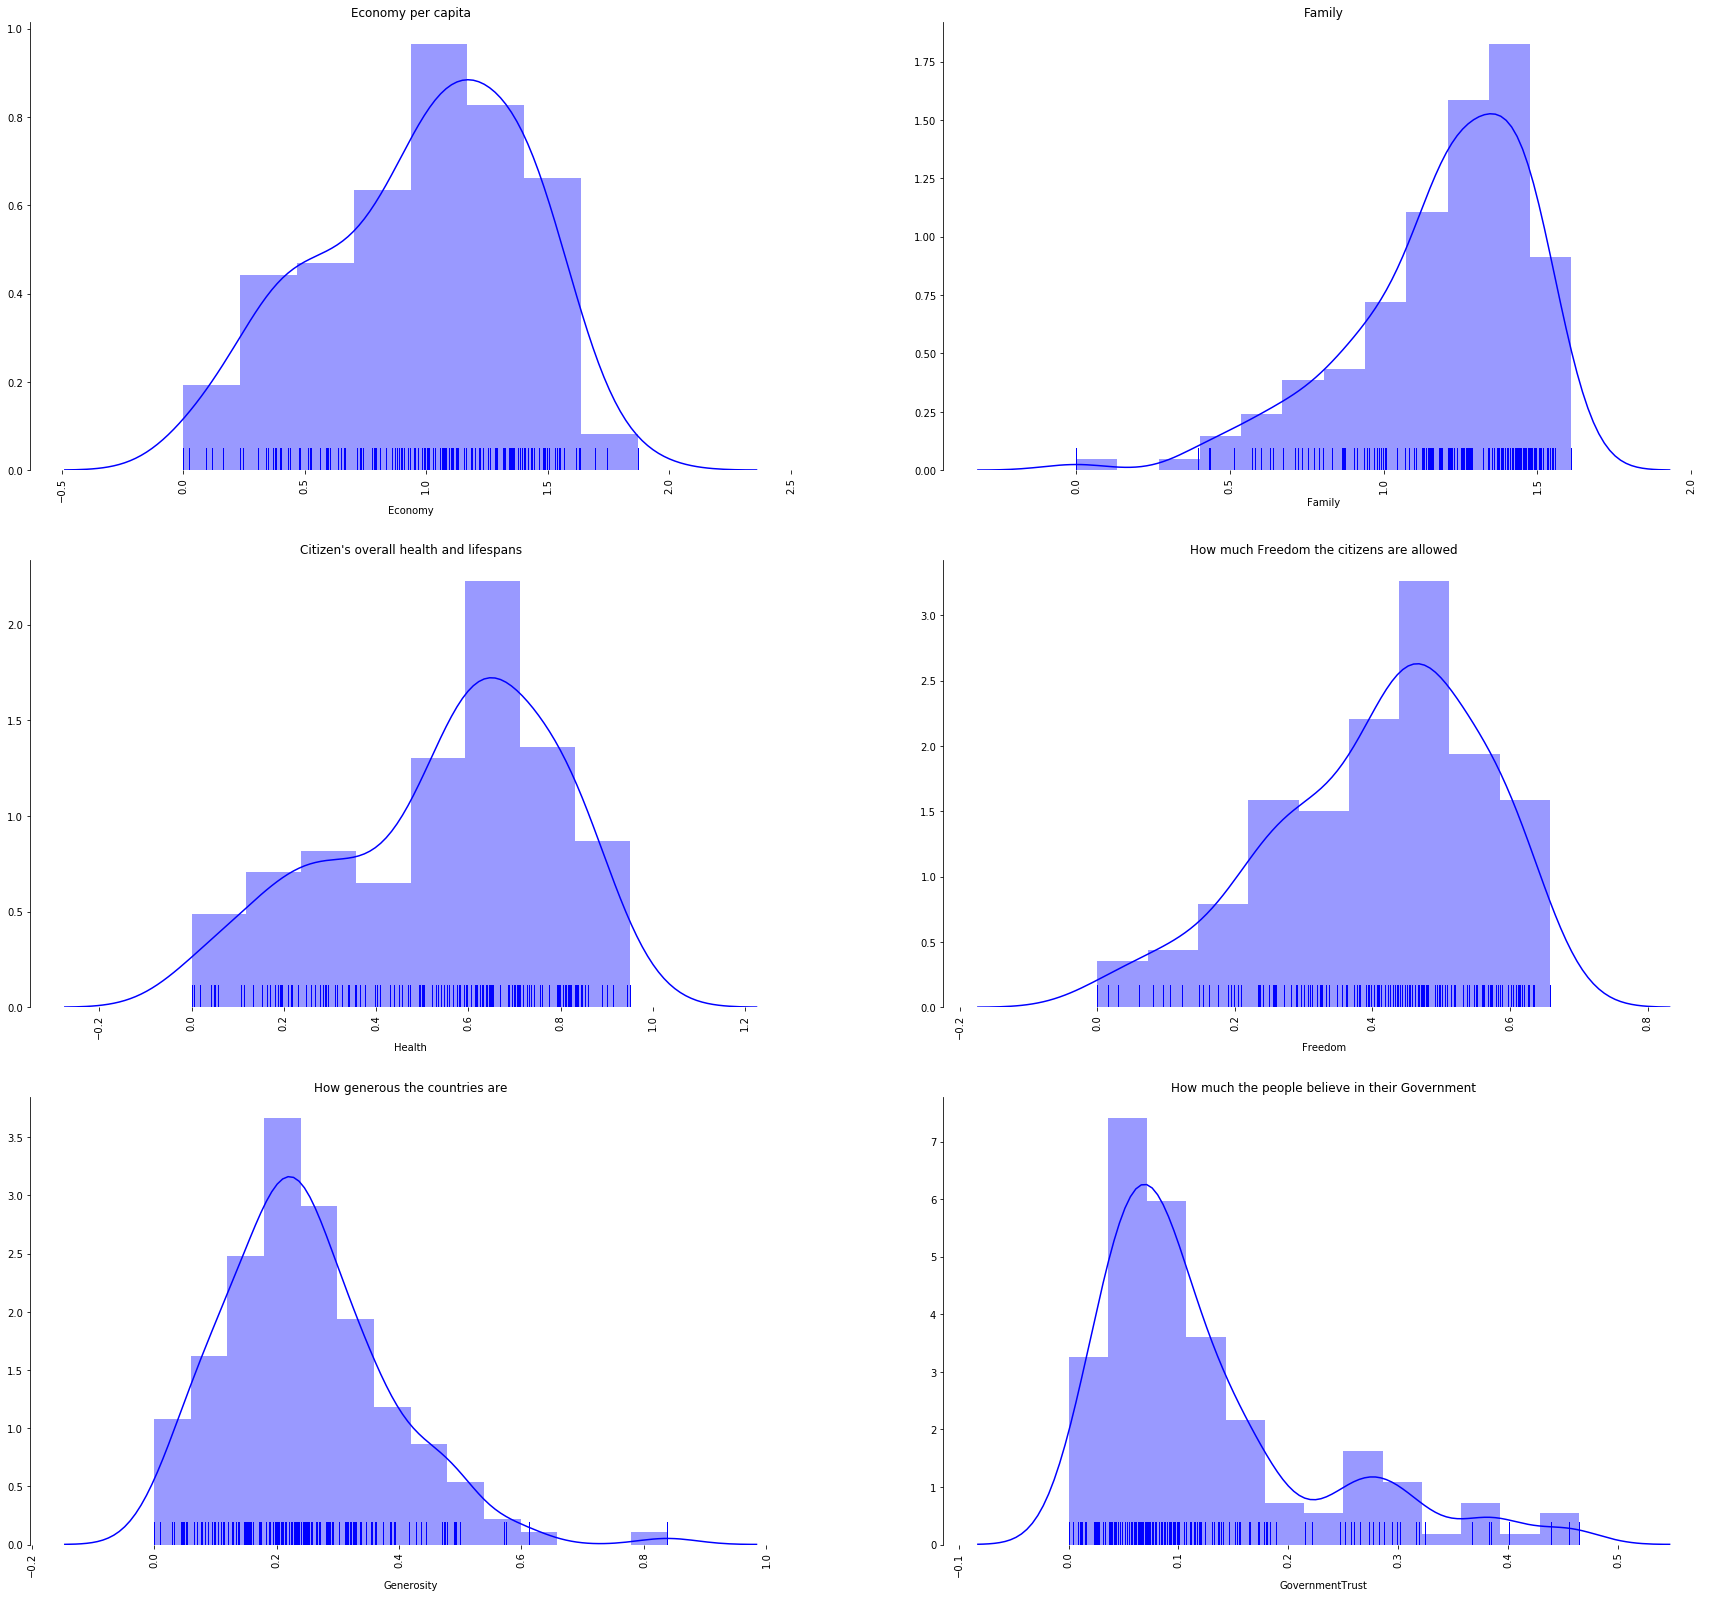

In [9]:
plt.figure(figsize=(30, 28))
plt.subplot(3, 2, 1)
sns.distplot(happy_data.Economy, color="b", rug = True)
plt.title('Economy per capita')
plt.xlabel("Economy")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 2)
sns.distplot(happy_data.Family, color="b", rug = True)
plt.title('Family')
plt.xlabel("Family")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 3)
sns.distplot(happy_data.Health, color="b", rug = True)
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.title("Citizen's overall health and lifespans")
plt.xlabel("Health")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 4)
sns.distplot(happy_data.Freedom, color="b", rug = True)
plt.title('How much Freedom the citizens are allowed')
plt.xlabel("Freedom")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 5)
sns.distplot(happy_data.Generosity, color="b", rug = True)
plt.title('How generous the countries are')
plt.xlabel("Generosity")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 6)
sns.distplot(happy_data.GovernmentTrust, color="b", rug = True)
plt.title('How much the people believe in their Government')
plt.xlabel("GovernmentTrust")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

 When looking at the graphs below I found the largest correlation between the happiness rankings and the country's economy, with health being a close second. While there is a saying that, "money can't buy happiness," in regards to the low income that many of these lower ranking countries might be enduring, not having enough money is directly causing their unhappiness. I chose to split data in half and compare the halves in the 12 graphs below to show the significant differences between the two halves. 

In [10]:
top_happy_data = happy_data[happy_data['Happiness.Rank'] < happy_data['Happiness.Rank'].quantile(0.50)]

In [11]:
bot_happy_data = happy_data[happy_data['Happiness.Rank'] > happy_data['Happiness.Rank'].quantile(0.50)]

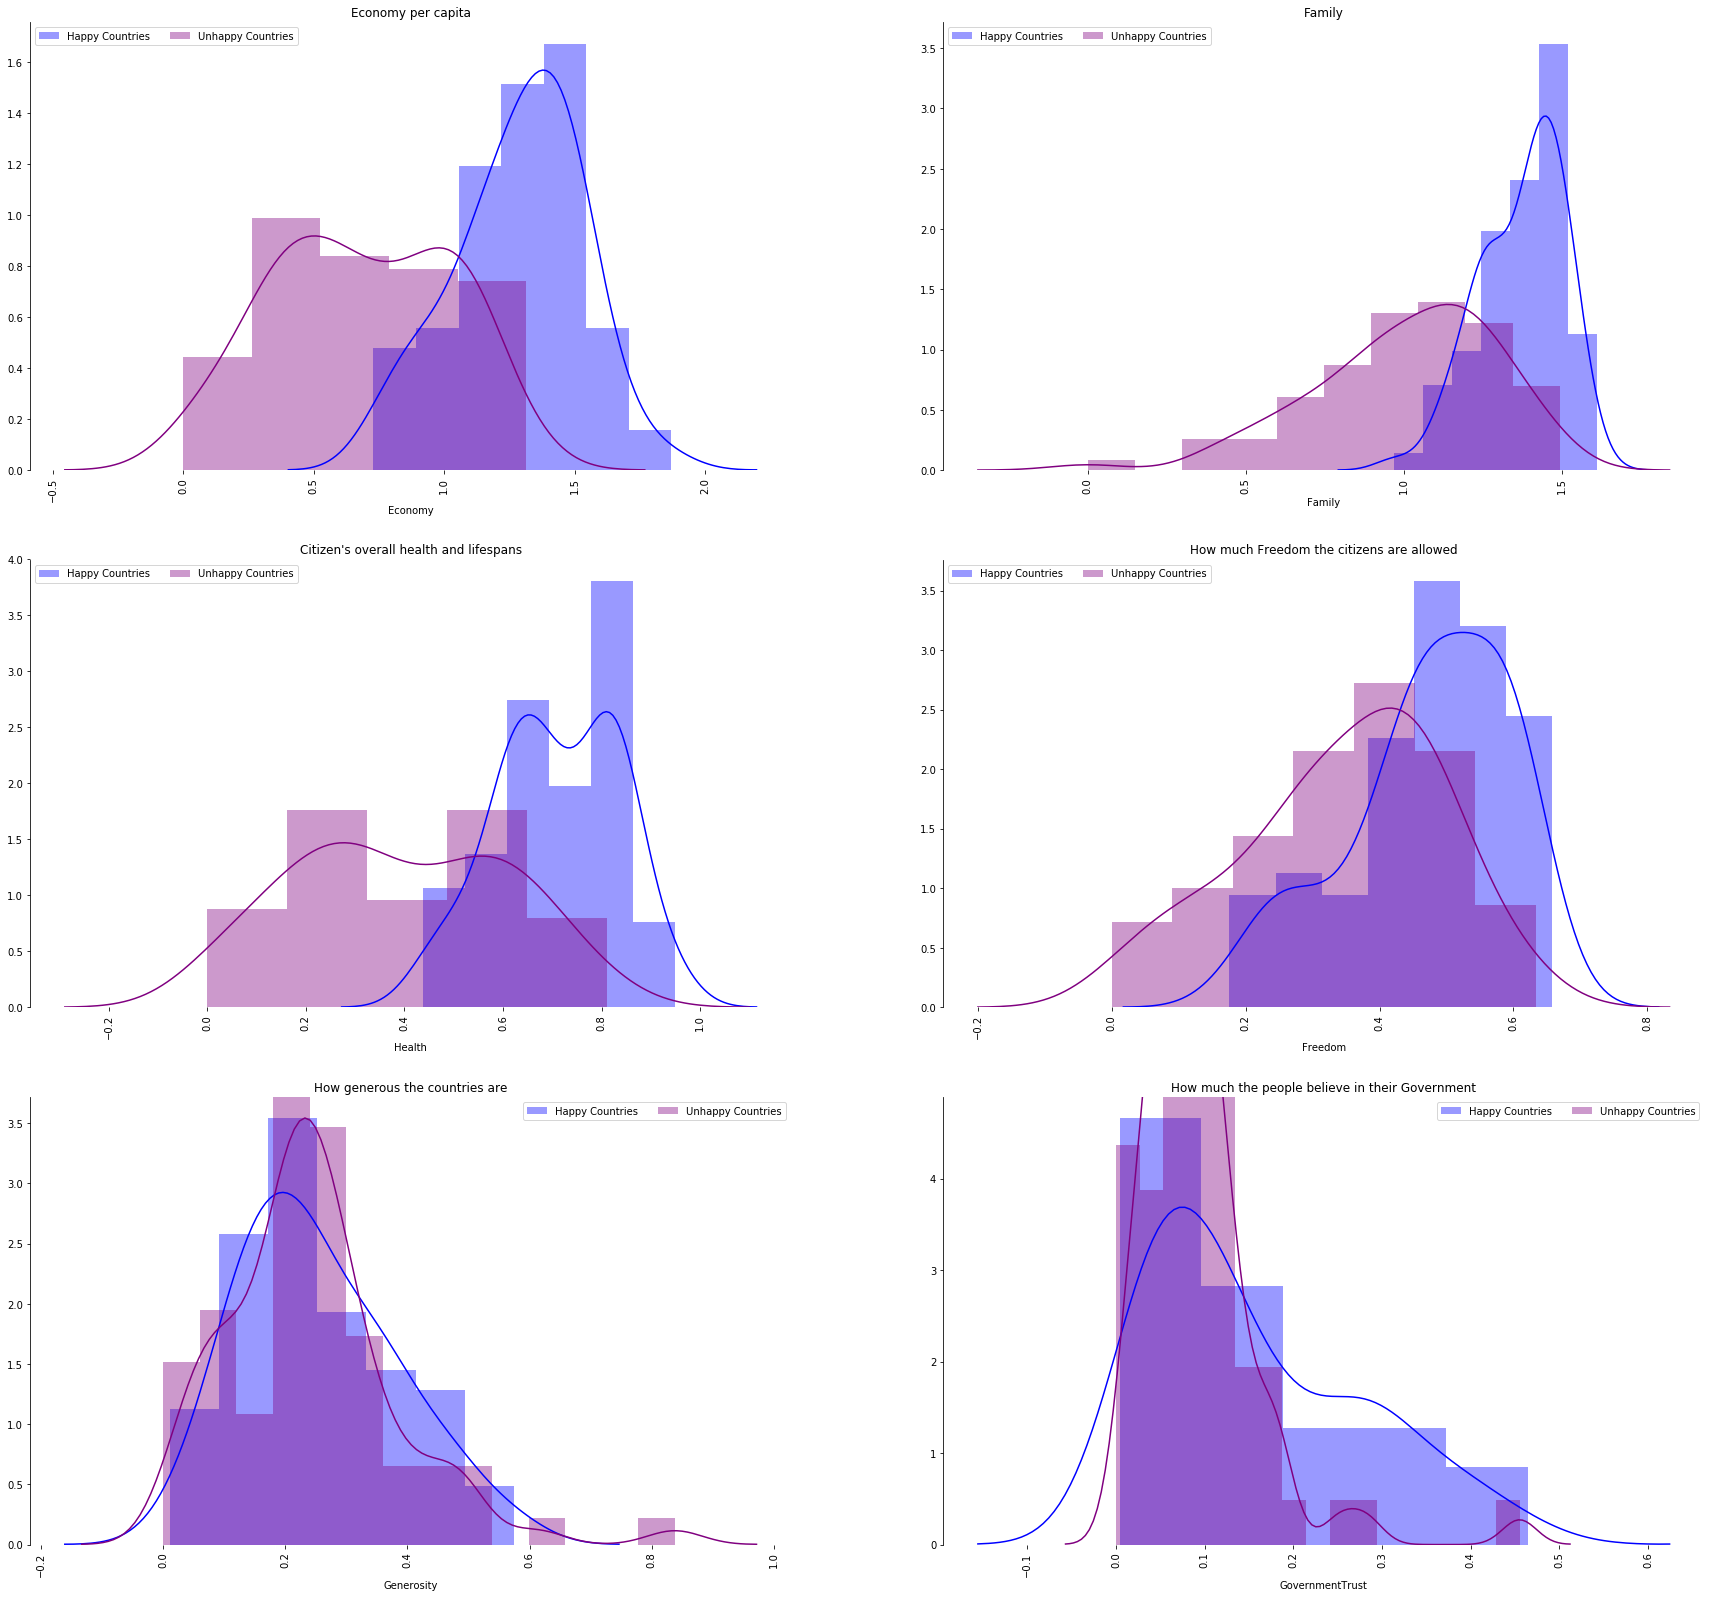

In [12]:
plt.figure(figsize=(30, 28))
plt.subplot(3, 2, 1)
sns.distplot(top_happy_data.Economy, color="b", label="Happy Countries")
sns.distplot(bot_happy_data.Economy, color="purple", label="Unhappy Countries")
plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('Economy per capita')
plt.xlabel("Economy")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 2)
sns.distplot(top_happy_data.Family, color="b", label="Happy Countries")
sns.distplot(bot_happy_data.Family, color="purple", label="Unhappy Countries")
plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('Family')
plt.xlabel("Family")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 3)
sns.distplot(top_happy_data.Health, color="b", label="Happy Countries")
sns.distplot(bot_happy_data.Health, color="purple", label="Unhappy Countries")
plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title("Citizen's overall health and lifespans")
plt.xlabel("Health")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 4)
sns.distplot(top_happy_data.Freedom, color="b", label="Happy Countries")
sns.distplot(bot_happy_data.Freedom, color="purple", label="Unhappy Countries")
plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('How much Freedom the citizens are allowed')
plt.xlabel("Freedom")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 5)
sns.distplot(top_happy_data.Generosity, color="b", label="Happy Countries")
sns.distplot(bot_happy_data.Generosity, color="purple", label="Unhappy Countries")
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.title('How generous the countries are')
plt.xlabel("Generosity")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 6)
sns.distplot(top_happy_data.GovernmentTrust, color="b", label="Happy Countries")
sns.distplot(bot_happy_data.GovernmentTrust, color="purple", label="Unhappy Countries")
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.title('How much the people believe in their Government')
plt.xlabel("GovernmentTrust")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

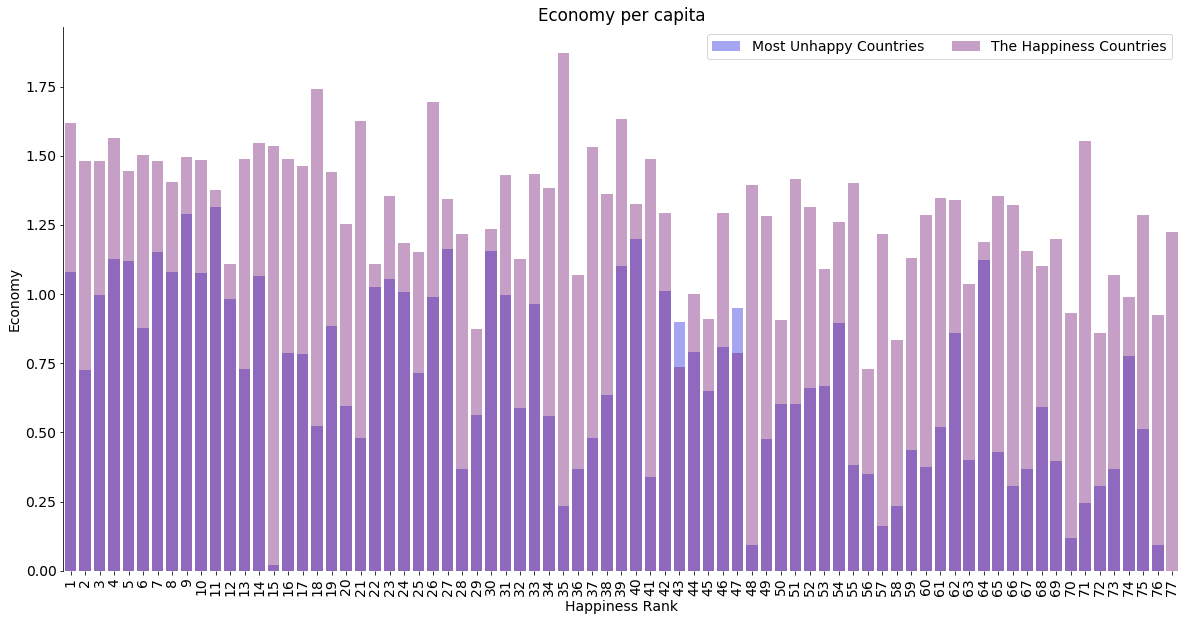

In [22]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 14})

sns.barplot(x='Happiness.Rank', y="Economy", data=bot_happy_data,
            label="Happy Countries", color="b", alpha = .40)

sns.barplot(x='Happiness.Rank', y="Economy", data=top_happy_data,
            label="Unhappy Countries", color="purple", alpha = .40)

plt.legend(ncol=2, loc="upper right", frameon=True)
plt.title('Economy per capita')
plt.xlabel("Happiness Rank")
plt.ylabel("Economy")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

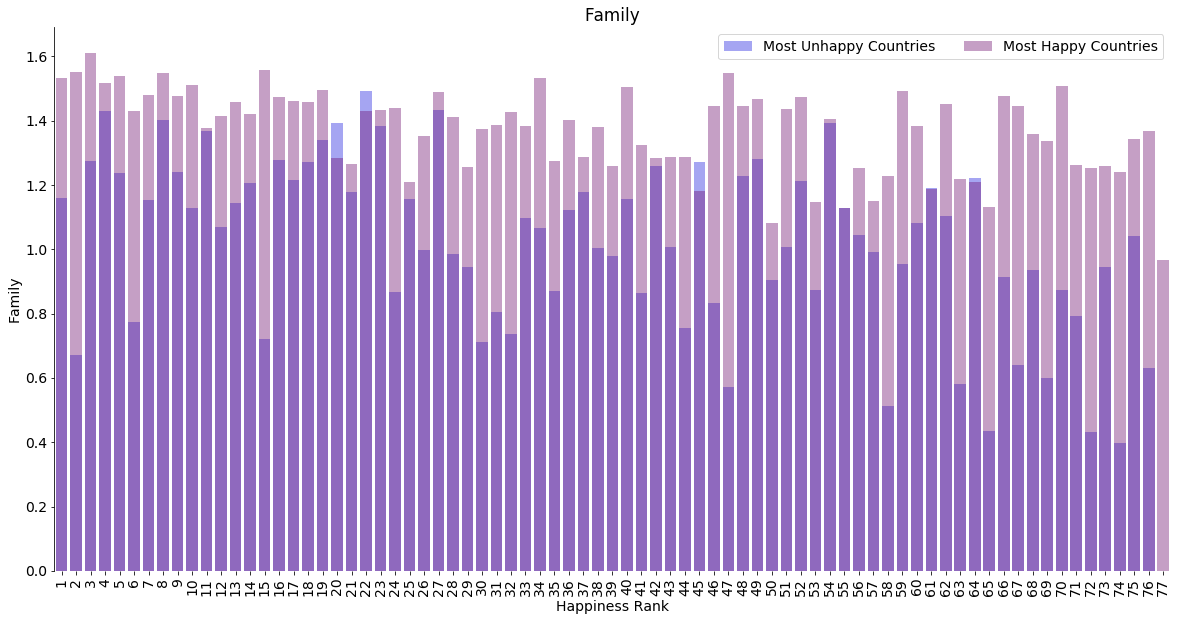

In [21]:
sns.barplot(x='Happiness.Rank', y="Family", data=bot_happy_data,
            label="Happy Countries", color="b", alpha = .40)

sns.barplot(x='Happiness.Rank', y="Family", data=top_happy_data,
            label="Unhappy Countries", color="purple", alpha = .40)

plt.legend(ncol=2, loc="upper right", frameon=True)
plt.title('Family')
plt.xlabel("Happiness Rank")
plt.ylabel("Family")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

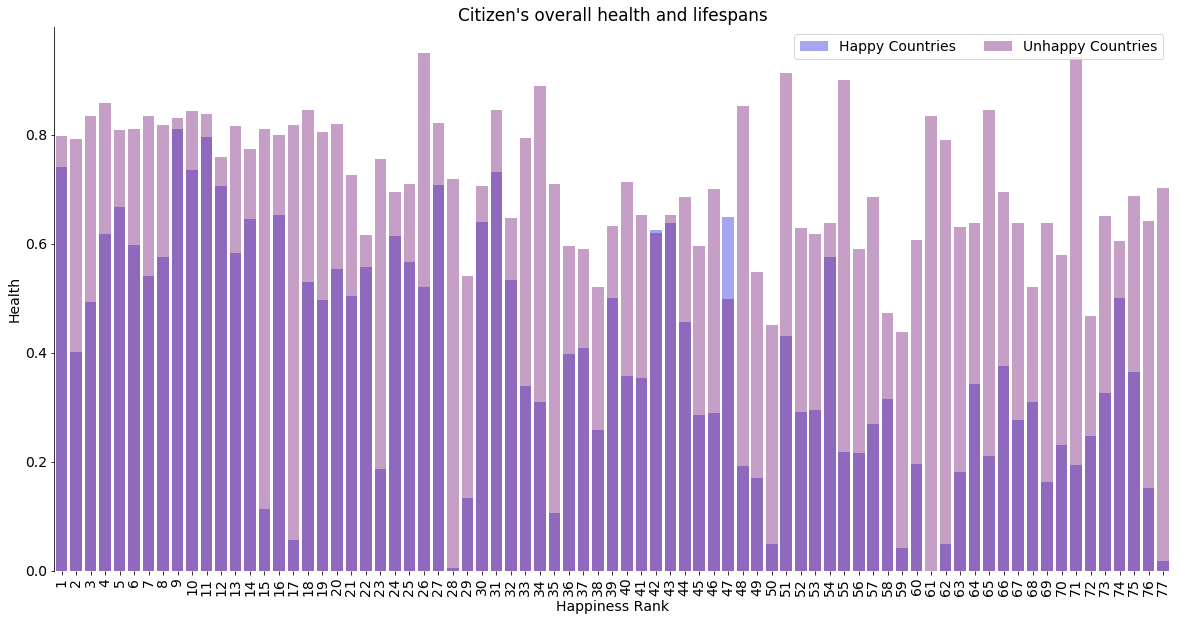

In [23]:
sns.barplot(x='Happiness.Rank', y="Health", data=bot_happy_data,
            label="Happy Countries", color="b", alpha = .40)

sns.barplot(x='Happiness.Rank', y="Health", data=top_happy_data,
            label="Unhappy Countries", color="purple", alpha = .40)

plt.legend(ncol=2, loc="upper right", frameon=True)
plt.title("Citizen's overall health and lifespans")
plt.xlabel("Happiness Rank")
plt.ylabel("Health")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

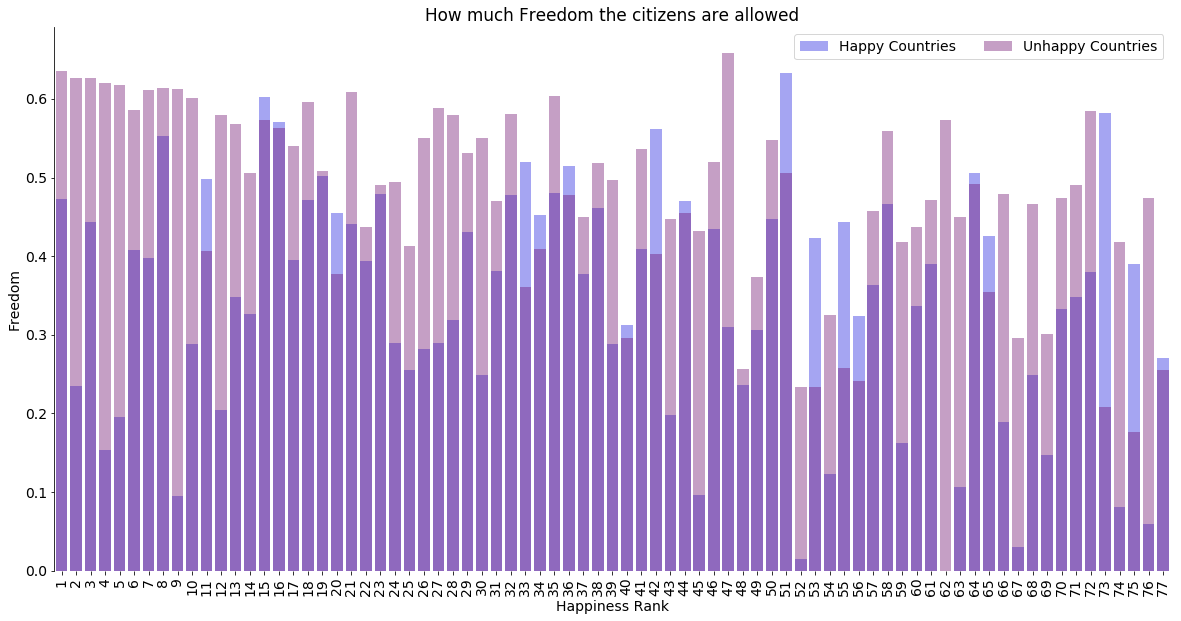

In [24]:

sns.barplot(x='Happiness.Rank', y="Freedom", data=bot_happy_data,
            label="Happy Countries", color="b", alpha = .40)

sns.barplot(x='Happiness.Rank', y="Freedom", data=top_happy_data,
            label="Unhappy Countries", color="purple", alpha = .40)

plt.legend(ncol=2, loc="upper right", frameon=True)
plt.title('How much Freedom the citizens are allowed')
plt.xlabel("Happiness Rank")
plt.ylabel("Freedom")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

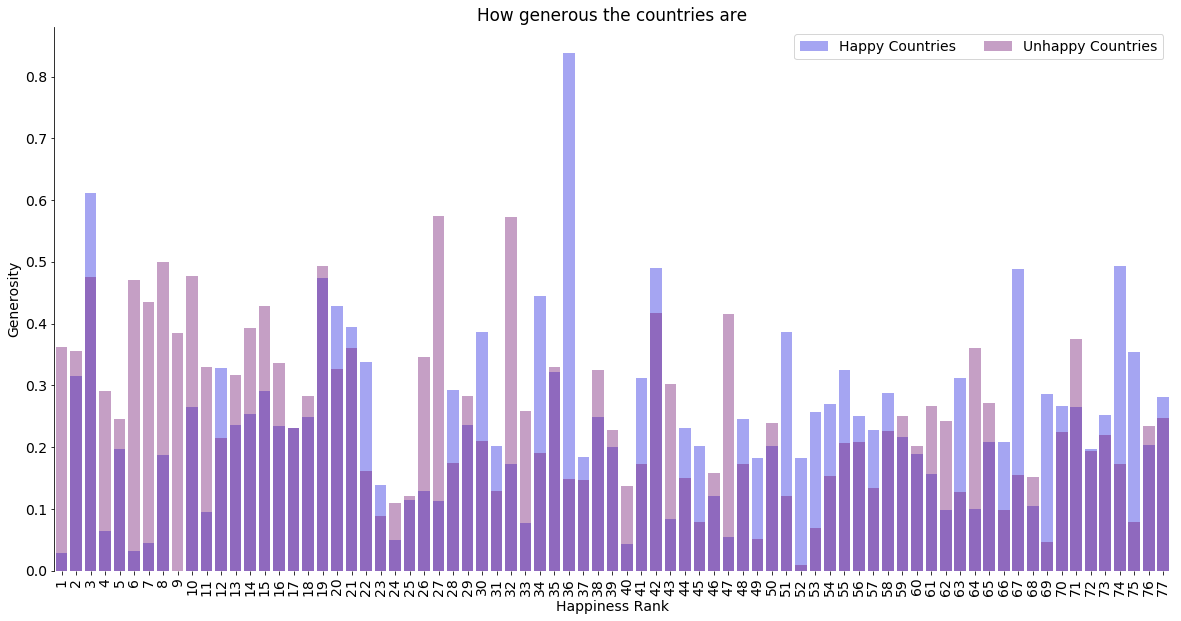

In [26]:
sns.barplot(x='Happiness.Rank', y="Generosity", data=bot_happy_data,
            label="Happy Countries", color="b", alpha = .40)

sns.barplot(x='Happiness.Rank', y="Generosity", data=top_happy_data,
            label="Unhappy Countries", color="purple", alpha = .40)

plt.legend(ncol=2, loc="upper right", frameon=True)
plt.title('How generous the countries are')
plt.xlabel("Happiness Rank")
plt.ylabel("Generosity")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

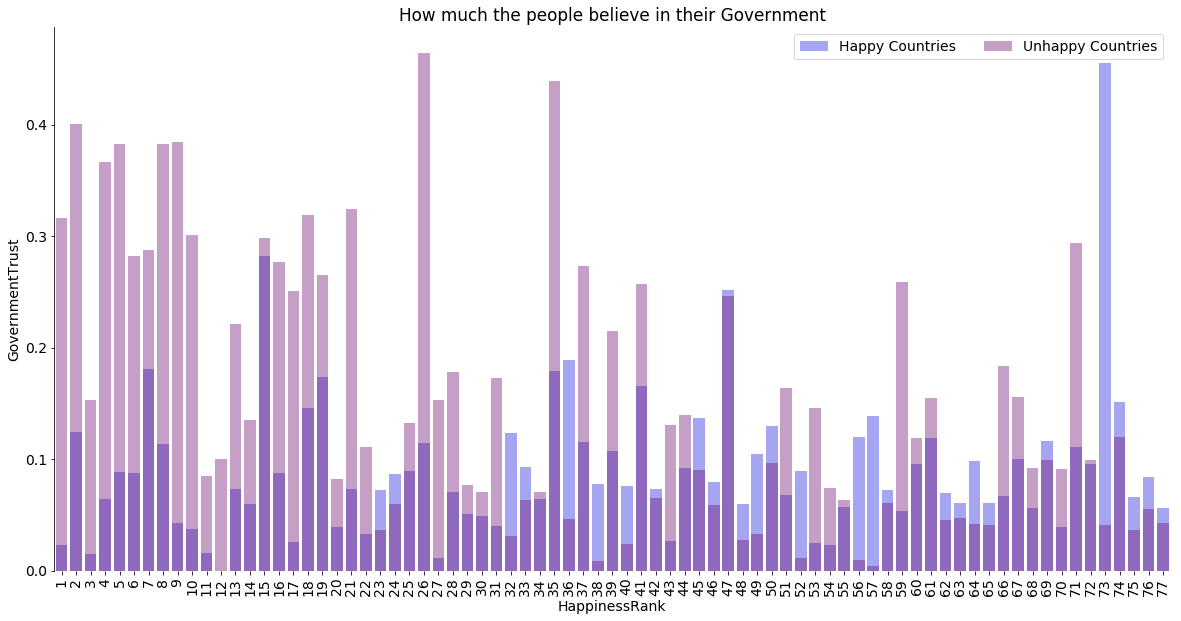

In [25]:
sns.barplot(x='Happiness.Rank', y="GovernmentTrust", data=bot_happy_data,
            label="Happy Countries", color="b", alpha = .40)

sns.barplot(x='Happiness.Rank', y="GovernmentTrust", data=top_happy_data,
            label="Unhappy Countries", color="purple", alpha = .40)

plt.legend(ncol=2, loc="upper right", frameon=True)
plt.title('How much the people believe in their Government')
plt.xlabel("HappinessRank")
plt.ylabel("GovernmentTrust")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

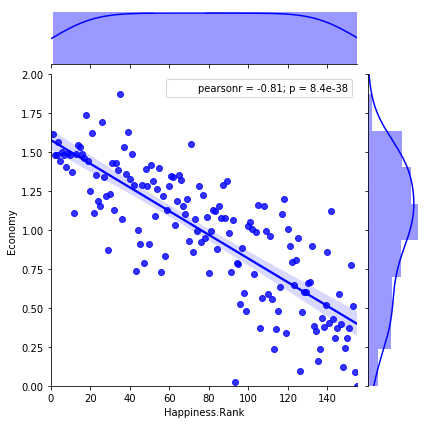

In [42]:
sns.jointplot(happy_data['Happiness.Rank'], happy_data['Economy'], kind="reg", color="b")
plt.xlim(0, 155)
plt.ylim(0, 2, .25)
plt.show()

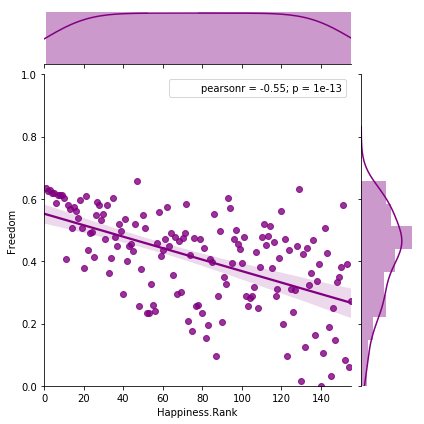

In [43]:
sns.jointplot(happy_data['Happiness.Rank'], happy_data['Freedom'], kind="reg", color="purple")
plt.xlim(0, 155)
plt.ylim(0, 1, .1)
plt.show()

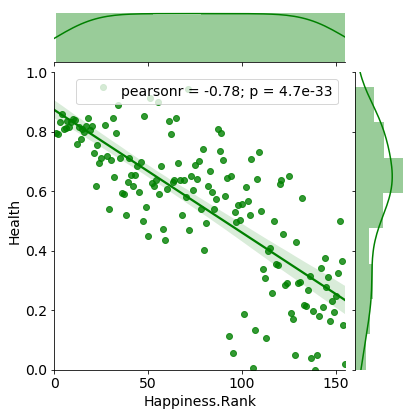

In [34]:
sns.jointplot(happy_data['Happiness.Rank'], happy_data['Health'], kind="reg", color="g")
plt.xlim(0, 155)
plt.ylim(0, 1, .25)
plt.show()

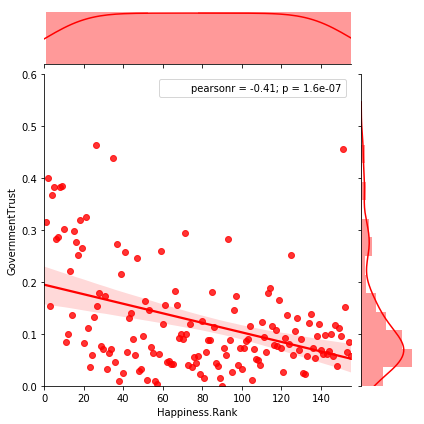

In [48]:
sns.jointplot(happy_data['Happiness.Rank'], happy_data['GovernmentTrust'], kind="reg", color="r")
plt.xlim(0, 155)
plt.ylim(0, .6)
plt.show()

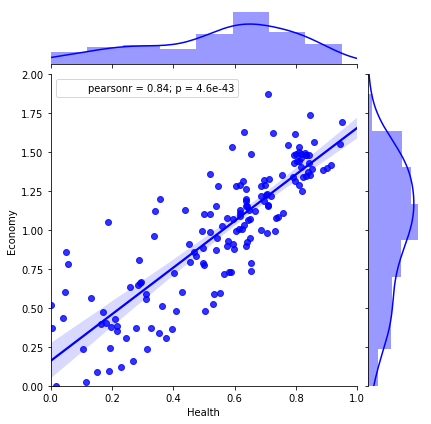

In [50]:
sns.jointplot(happy_data['Health'], happy_data['Economy'], kind="reg", color="b")
plt.xlim(0, 1)
plt.ylim(0, 2, .25)
plt.show()

In [13]:
print(ttest_ind(top_happy_data['Happiness.Rank'], bot_happy_data['Happiness.Rank'], equal_var=False))

Ttest_indResult(statistic=-21.633307652783937, pvalue=2.9431334333621385e-48)


In [14]:
print(ttest_ind(top_happy_data['Economy'], bot_happy_data['Economy'], equal_var=False))

Ttest_indResult(statistic=12.607191944997933, pvalue=1.008087044894325e-24)


## The Problem

We have determined that there is strong correlation between economy and happiness. Unhappiness is very commonly being seen with countries with poor economy or extremely low GDP per capita. Extreme poor economy is creating misery around many of the countries in the world and USAID greatly desires to alleviate this issue to the best of our ability.

## The (hypothetical) Solution

USAID will organize and establish skill training programs that will allow an increase revenue for members in these unhappy countries. The member's overall income will be improved therefore the happiness of the member will improve as  well. These positions will generate enough income for the workers to better support their families and should enable them to live happier lives. 

## My Hypothesis

This program will have a positive influence on overall happiness of the members.

## Sampling

USAID will start with a single country and interview 10,000 with a balanced variety of education, age, gender, and employement status in a particular area in the country. During the interview, each individual will take a survey describing themselves and rate their happiness through a series of questions. 5,000 of interviewees will be chosen to be part of the program.

## Rollout Plan

### 1-9 months
The plan will start with taking 20% or 1,000 candidates and give them the training that should take approximately 3 months. At the nine-month point of the program, the candidates will be given the same survey again, as would 1,000 similar interviewees that were not accepted into the training program. If the program's trainees(group A) have a 20% or higher hapiness score than the nontrainees(group B), the program will continue
### 9-18 months
The program will continue upon satisfactory results. At the 18-month mark, the program will train 30% of the candidates(1,500) after nine months or the 18-month mark the candidates will be given the same survey again, as would 1,500 similar interviewees that were not accepted into the training program. If the program's trainees(group A) again had a 20% or higher hapiness score than the nontrainees(group B), the program will continue
### 18-24 months
At the 24-month mark, the program will train 50% of the candidates(2,500), the rest of the approved candidates. 
### 24-36 months
At the three year mark all of the interviewees will again be given the same survey to determine happiness.  

## Testing

At the end of the program the 36-month mark all interviewees will be given the same survey to determine the happiness levels of both the trainee(group A) and the nontrainee(group B).

## Evaluation Plan

This program will prove successful if after the three year time period, the average happiness score if the trainees have a 20% or higher happiness score than the nontrainees. If the happiness levels are above that amount this program will prove to successfully be creating a better life for all those it helps. We will also be able to determine the difference in happiness our program has made in their lives.